# Types of Outliers

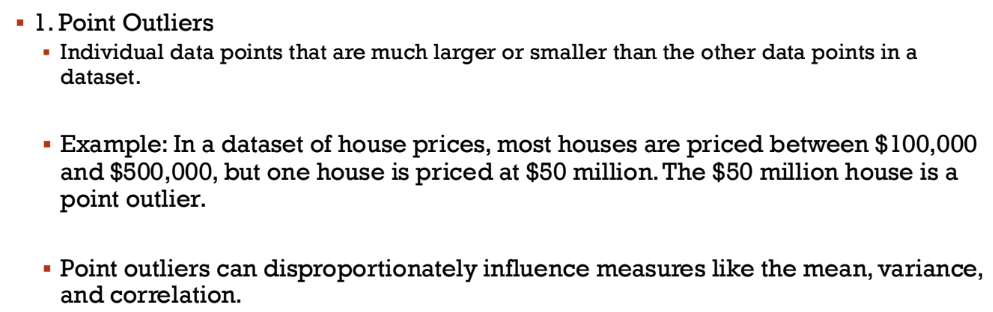

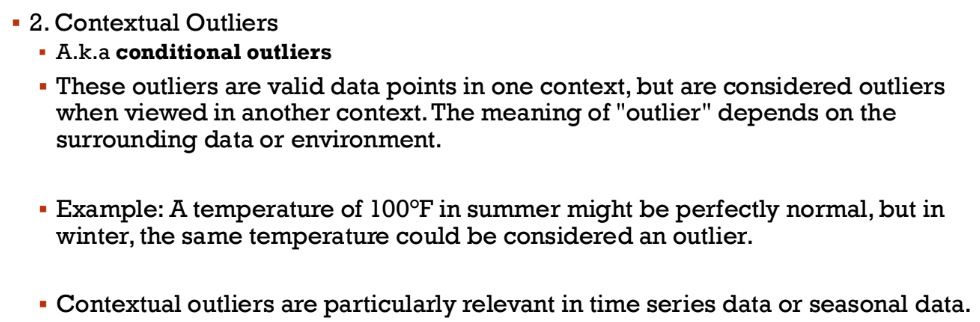

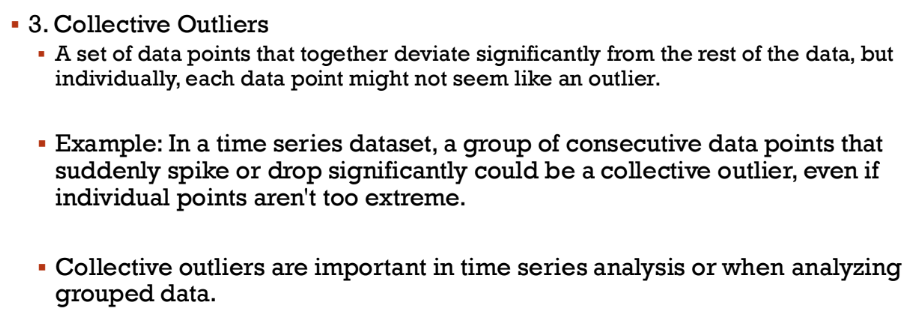

          a         b         c
0  0.694928 -1.121248  0.414856
1  0.892418  0.478420  1.516511
2  0.628904  1.623216  0.882472
3  0.055045  0.874909  0.143906
4  0.994517 -1.011888  0.509996


<Axes: >

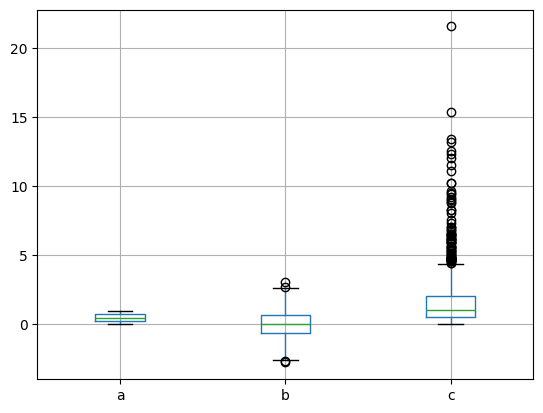

In [2]:
import numpy as np
import pandas as pd

# BOXPLOT EXAMPLE
df = pd.DataFrame({'a': np.random.rand(1000), 'b': np.random.randn(1000),'c': np.random.lognormal(size=(1000))})

print(df.head())

df.boxplot()

# Outlier detection

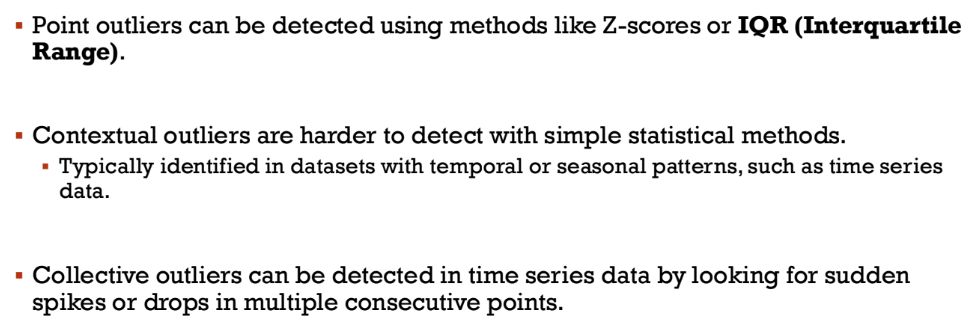

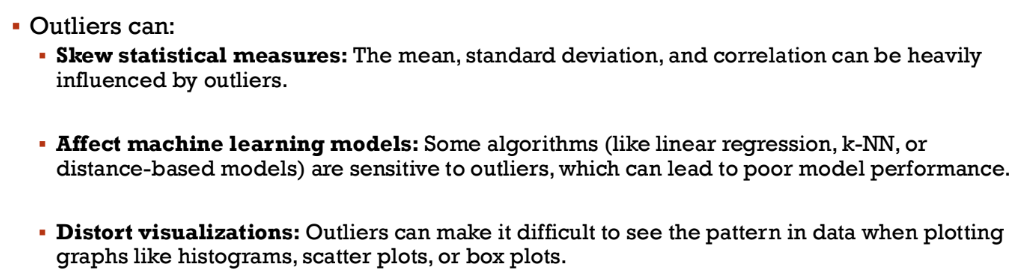

## Point outlier

In [ ]:
import numpy as np

# Sample data
data = [-10, 20, 30, 40, 50, 60, 70, 80, 90, 1000, 1100]

# Convert to numpy array for convenience
data = np.array(data)

In [ ]:
# Calculate Q1 (25th percentile)
Q1 = np.percentile(data, 25)

# Calculate Q3 (75th percentile)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1
# print("IQR = ",IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# outliers = [x for x in data if x < lower_bound or x > upper_bound]
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Output results
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Outliers:", outliers)

Q1 (25th percentile): 35.0
Q3 (75th percentile): 85.0
IQR: 50.0
Lower Bound for Outliers: -40.0
Upper Bound for Outliers: 160.0
Outliers: [1000 1100]


## Contextual outliers

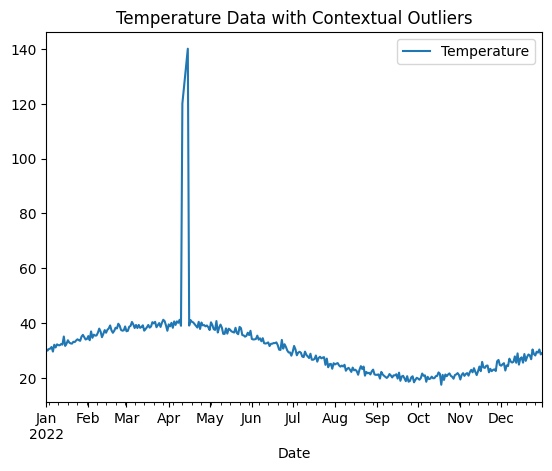

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: daily temperatures in Fahrenheit over a year (example)
dates = pd.date_range("2022-01-01", periods=365)
temperatures = [30 + np.sin(i * 2 * np.pi / 365) * 10 + np.random.randn() for i in range(365)]

# Injecting some contextual outliers (temperatures higher than 120°F in winter)
temperatures[100:105] = [120, 125, 130, 135, 140]

# Create a DataFrame
df = pd.DataFrame({"Date": dates, "Temperature": temperatures})

# Visualize the data
df.plot(x="Date", y="Temperature", title="Temperature Data with Contextual Outliers")
plt.show()

## Collective outliers

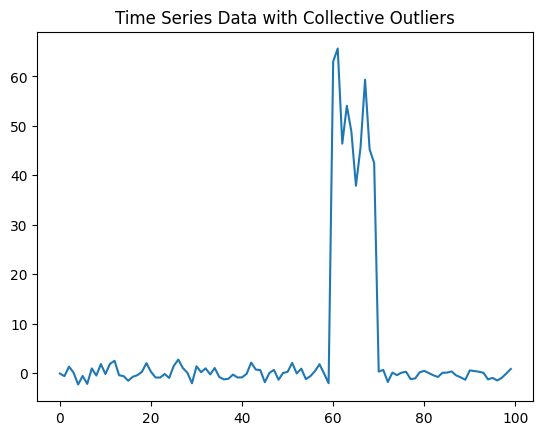

Collective Outliers indices: (array([59, 66]),)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series data
data = np.random.normal(loc=0, scale=1, size=100)  # Normal distribution
data[60:70] = np.random.normal(loc=50, scale=10, size=10)  # Inject collective outlier

# Create a DataFrame
df = pd.DataFrame({"Time": range(100), "Value": data})

# Visualize the time series data
plt.plot(df["Time"], df["Value"])
plt.title("Time Series Data with Collective Outliers")
plt.show()

# Identify collective outliers using rolling window or difference
diff = np.diff(df['Value'])
outliers = np.where(diff > 10)  # Difference greater than a threshold (for example, 10)
print("Collective Outliers indices:", outliers)


# Treating Outliers

##1.Remove Outliers:

If the outliers are erroneous or irrelevant, you can remove them from the dataset.

In [ ]:
# Removing outliers (using the point outliers data from earlier)
import numpy as np

# Sample data
data = [-10, 20, 30, 40, 50, 60, 70, 80, 90, 1000, 1100]
# Convert to numpy array for convenience
data = np.array(data)

# Calculate Q1 (25th percentile)
Q1 = np.percentile(data, 25)

# Calculate Q3 (75th percentile)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1
print("IQR = ",IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

data_cleaned = data[(data >= lower_bound) & (data <= upper_bound)]
print("Original data:", data)
print("Data after removing outliers:", data_cleaned)

IQR =  50.0
Lower Bound: -40.0
Upper Bound: 160.0
Original data: [ -10   20   30   40   50   60   70   80   90 1000 1100]
Data after removing outliers: [-10  20  30  40  50  60  70  80  90]


In [ ]:
import pandas as pd
import numpy as np

# Sample data with potential outliers
data = [-10, 20, 30, 40, 50, 60, 70, 80, 90, 1000, 1100]

# Create a DataFrame
df_data = pd.DataFrame({'Value': data})

In [ ]:
# Removing outliers using Z-score (manual calculation)
# Calculate mean and standard deviation
mean = df_data['Value'].mean()
std_dev = df_data['Value'].std()
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

# Calculate Z-scores manually
z_scores = np.abs((df_data['Value'] - mean) / std_dev)
print("Z-Score Table:")
print(z_scores)

# Define a threshold (e.g., 3)
threshold = 2

# Identify outliers
# outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers
# df_removed_outliers = df_data.drop(outlier_indices).reset_index(drop=True)
df_removed_outliers = df_data[(z_scores < threshold)]

print("Original DataFrame:")
display(df_data)
print("\nDataFrame after removing outliers (Z-score > 2, manual calculation):")
display(df_removed_outliers)

Mean: 230.0
Standard Deviation: 407.01351328917815
Z-Score Table:
0     0.589661
1     0.515953
2     0.491384
3     0.466815
4     0.442246
5     0.417677
6     0.393107
7     0.368538
8     0.343969
9     1.891829
10    2.137521
Name: Value, dtype: float64
Original DataFrame:


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,1000



DataFrame after removing outliers (Z-score > 3, manual calculation):


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,1000


## 2.Capping or Clipping:

You can limit the outliers by setting them to a maximum or minimum value.

In [ ]:
# Capping or Clipping (using the point outliers data)
import numpy as np

# Sample data
data = [-10, 20, 30, 40, 50, 60, 70, 80, 90, 1000, 1100]
# Convert to numpy array for convenience
data = np.array(data)

# Calculate Q1 (25th percentile)
Q1 = np.percentile(data, 25)

# Calculate Q3 (75th percentile)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1
# print("IQR = ",IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the upper bound, set lower outliers to the lower bound
# Values in the array that are below the minimum are replaced with the minimum, and values above the maximum are replaced with the maximum.
data_capped = np.clip(data, lower_bound, upper_bound)
print("Original data:", data)
print("Data after capping:", data_capped)

Original data: [ -10   20   30   40   50   60   70   80   90 1000 1100]
Data after capping: [-10.  20.  30.  40.  50.  60.  70.  80.  90. 160. 160.]


In [ ]:
# Capping or Clipping using IQR
Q1 = df_data['Value'].quantile(0.25)
Q3 = df_data['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df_capped = df_data.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

print("Original DataFrame:")
display(df_data)
print("\nDataFrame after capping outliers (IQR method):")
display(df_capped)

Original DataFrame:


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,1000



DataFrame after capping outliers (IQR method):


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,160


## 3.Transformation:

Applying transformations like log, square root, or Box-Cox can help reduce the impact of outliers, especially in skewed data.

In [ ]:
# Transformation (using log transformation as an example)
import numpy as np

# Sample data
data = [-10, 20, 30, 40, 50, 60, 70, 80, 90, 1000, 1100]
# Convert to numpy array for convenience
data = np.array(data)

# Note: Log transformation is only applicable to positive data.
# For this example, we'll add a constant to make all values positive.
data_positive = data + abs(data.min()) # Ensure all values are positive
data_transformed = np.log(data_positive + 1) # +1 to avoid log(0)
print("Original data (after making positive):", data_positive)
print("Data after log transformation:", data_transformed)

Original data (after making positive): [   1   31   41   51   61   71   81   91  101 1011 1111]
Data after log transformation: [0.         3.4339872  3.71357207 3.93182563 4.11087386 4.26267988
 4.39444915 4.51085951 4.61512052 6.91869522 7.01301579]


In [ ]:
# Transformation using Log Transformation
# Ensure all values are positive before applying log transformation
min_value = df_data['Value'].min()
if min_value <= 0:
    # Add a constant to make all values positive. Adding abs(min_value) + 1
    # ensures that even if the minimum is 0, the smallest value becomes 1.
    constant_add = abs(min_value) + 1
else:
    constant_add = 0

df_transformed = df_data.copy()
df_transformed['Value_transformed'] = np.log(df_transformed['Value'] + constant_add)

print("Original DataFrame:")
display(df_data)
print(f"\nDataFrame after log transformation (added constant: {constant_add}):")
display(df_transformed)

Original DataFrame:


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,1000



DataFrame after log transformation (added constant: 11):


,Value,Value_transformed
0,-10,0.000000
1,20,3.433987
2,30,3.713572
3,40,3.931826
4,50,4.110874
5,60,4.262680
6,70,4.394449
7,80,4.510860
8,90,4.615121
9,1000,6.918695


## 4.Imputation:

For some types of data, you may decide to impute outliers with meaningful values, such as the mean, median, or other model-based imputations.

In [ ]:
# Imputation (using the median as an example)
import numpy as np

# Sample data
data = [-10, 20, 30, 40, 50, 60, 70, 80, 90, 1000, 1100]
# Convert to numpy array for convenience
data = np.array(data)

# Calculate Q1 (25th percentile)
Q1 = np.percentile(data, 25)

# Calculate Q3 (75th percentile)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1
print("IQR = ",IQR)

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# For demonstration, let's create a copy of the data and replace outliers with NaN
data_with_nan = data.astype(float) # Convert to float to allow NaN
outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
data_with_nan[outlier_indices] = np.nan

# Impute NaN values with the median of the non-outlier data
data_cleaned = data[(data >= lower_bound) & (data <= upper_bound)]
median_value = np.median(data_cleaned) # Use median from the cleaned data
data_imputed = np.nan_to_num(data_with_nan, nan=median_value)

print("Original data with outliers as NaN:", data_with_nan)
print("Data after imputing outliers with median:", data_imputed)

IQR =  50.0
Original data with outliers as NaN: [-10.  20.  30.  40.  50.  60.  70.  80.  90.  nan  nan]
Data after imputing outliers with median: [-10.  20.  30.  40.  50.  60.  70.  80.  90.  50.  50.]


In [ ]:
# Imputation using Median (IQR method)
Q1 = df_data['Value'].quantile(0.25)
Q3 = df_data['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier_mask = (df_data['Value'] < lower_bound) | (df_data['Value'] > upper_bound)

# Calculate the median of non-outlier data
median_value = df_data.loc[~outlier_mask, 'Value'].median()

# Impute outliers with the median
df_imputed = df_data.copy()
df_imputed.loc[outlier_mask, 'Value'] = median_value

print("Original DataFrame:")
display(df_data)
print(f"\nDataFrame after imputing outliers with median ({median_value}):")
display(df_imputed)

Original DataFrame:


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,1000



DataFrame after imputing outliers with median (50.0):


,Value
0,-10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,50
